<a href="https://colab.research.google.com/github/Mateus-cpa/analise_fundamentalita_acoes/blob/main/An%C3%A1lise_fundamentalista_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ativos da Bolsa
A Bolsa de Valores brasileira, em consonância com o mercado internacional,se divide em 11 diferentes setores do mercado de ações, sistema de classificação mais utilizado: o Global Industry Classification Standard (GICS).




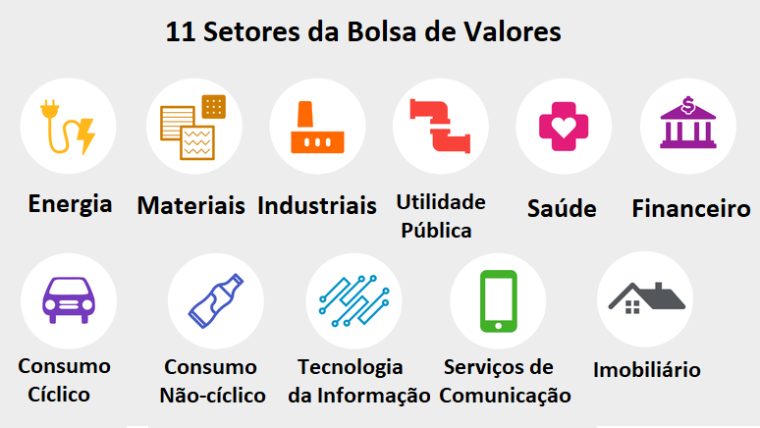

A B3, a bolsa de valores brasileira, é um mercado diversificado, com empresas de diversos setores da economia listadas. Cada setor representa um conjunto de empresas com características e perspectivas de crescimento distintas.

Os principais setores da B3 podem ser divididos em:

- Energia: Engloba todas as atividades relacionadas à exploração, produção, transformação, transporte e distribuição de energia. Essa energia pode ser proveniente de diversas fontes.
-Materiais básicos: Inclui empresas que exploram recursos naturais, como mineração, petróleo e gás. A performance desse setor é influenciada pelas cotações das commodities no mercado internacional.
- Industriais: Reúne empresas de diversos segmentos industriais, como indústria química, metalúrgica, automobilística, de alimentos e bebidas, entre outras. A performance desse setor costuma estar ligada ao ciclo econômico e à demanda interna e externa.
- Utilidade pública: Reúne empresas que prestam serviços essenciais à população, como saneamento básico. Geralmente, são empresas com maior estabilidade nos resultados.
-Saúde: Reúne empresas que atuam no setor de saúde, como hospitais, laboratórios e fabricantes de medicamentos. A demanda por serviços de saúde tende a crescer com o envelhecimento da população.
- Financeiro: Engloba bancos, seguradoras, administradoras de fundos e outras instituições financeiras. Esse setor é geralmente bastante representativo na bolsa, devido à importância do sistema financeiro para a economia.
- Consumo Cíclico (Sensibilidade ao ciclo econômico): A demanda por produtos e serviços desse setor varia significativamente de acordo com a fase do ciclo econômico. Em períodos de expansão econômica, com alta renda e baixo desemprego, a demanda aumenta. Já em momentos de recessão, a demanda tende a cair.
- Consumo Não Cíclico (Menor sensibilidade ao ciclo econômico): A demanda por produtos e serviços desse setor é menos influenciada pelas flutuações econômicas. As pessoas continuam consumindo esses produtos mesmo em momentos de crise, pois são considerados essenciais ou básicos.
-Tecnologia: Abriga empresas que desenvolvem e comercializam produtos e serviços de tecnologia, como software, hardware e serviços de internet. Esse setor tem crescido significativamente nos últimos anos, impulsionado pela digitalização da economia.
-Serviços de Comunicação: ode ser considerado parte do consumo não cíclico, especialmente quando se trata de serviços básicos como telefonia e internet. A necessidade de se comunicar e ter acesso à informação se tornou essencial na vida moderna, independentemente da fase do ciclo econômico
-Imobiliário: É um dos mais importantes da economia, englobando a construção, compra, venda e aluguel de imóveis. Ele está intrinsecamente ligado ao desenvolvimento urbano, à geração de empregos e ao crescimento econômico.

##Por que é importante conhecer os setores da B3?

Ao investir na bolsa, conhecer os diferentes setores é fundamental para:

- Diversificar a carteira: Ao investir em empresas de diferentes setores, você reduz o risco de perdas, pois os diferentes setores tendem a reagir de forma distinta às variações do mercado.
-Identificar oportunidades: Ao acompanhar os diferentes setores, você pode identificar oportunidades de investimento em setores com maior potencial de crescimento.
-Gerenciar riscos: Ao entender as características de cada setor, você pode tomar decisões de investimento mais conscientes e gerenciar melhor os riscos da sua carteira.

Lembre-se: A classificação dos setores pode variar de acordo com a fonte e os critérios utilizados. Além disso, é importante realizar uma análise aprofundada de cada empresa antes de tomar qualquer decisão de investimento.



#Instalação de Biblioteca

In [1]:
!pip install kaggle==1.5.12


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73027 sha256=6fa9017bae46a900dc74446c4cd79aa8ba32067bbe536d009d236943f21a9b39
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


# Importação de bibliotecas

In [2]:
#básicos de processamento de dados
import pandas as pd
import json
from datetime import date, timedelta
import numpy as np

#visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#importanto itertools
import itertools

#Gestão de APIs
import requests
import warnings
warnings.filterwarnings('ignore')

#gerenciar arquivos externos ao notebook
from google.colab import files

# API da Yahoo Finance
import yfinance as yf

# machine learning (ML) - Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# visualização de árvore de decisão
import graphviz
from sklearn import tree

# avaliação de resultados da ML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Carregamento de dados

## Habilitando o Kaggle para baixar dataset

In [3]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


## Carregar os dados no notebook

In [4]:
# importar datasets do kaggle: composição do ibovespa, dados fundamentalistas

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mateuscpinheiro/status-invest

!unzip status-invest.zip



  0% 0.00/83.9k [00:00<?, ?B/s]
100% 83.9k/83.9k [00:00<00:00, 60.9MB/s]
Archive:  status-invest.zip
  inflating: Setorial B3 (portugus).xlsx  
  inflating: statusinvest-busca-avancada.csv  


## Carga de datasets

##Dataframe das classificações

In [5]:
# ler planilha excel de segmentos do site da B3
df_classificacao = pd.read_excel('/content/Setorial B3 (portugus).xlsx', header=6)
df_classificacao.head(10)

,SETOR ECONÔMICO,SUBSETOR,SEGMENTO,LISTAGEM,Unnamed: 4
0,NaN,NaN,NaN,CÓDIGO,SEGMENTO
1,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",NaN,NaN
2,NaN,NaN,3R PETROLEUM,RRRP,NM
3,NaN,NaN,COSAN,CSAN,NM
4,NaN,NaN,ENAUTA PART,ENAT,NM
5,NaN,NaN,PET MANGUINH,RPMG,NaN
6,NaN,NaN,PETROBRAS,PETR,N2
7,NaN,NaN,PETRORECSA,RECV,NM
8,NaN,NaN,PETRORIO,PRIO,NM
9,NaN,NaN,RAIZEN,RAIZ,N2


In [6]:
#corrige tabela
df_classificacao['nome'] = df_classificacao['SEGMENTO']

#transforma em NaN em SEGMENTO onde SUBSETOR for NaN
df_classificacao.loc[df_classificacao['SUBSETOR'].isna(), 'SEGMENTO'] = None

df_classificacao

,SETOR ECONÔMICO,SUBSETOR,SEGMENTO,LISTAGEM,Unnamed: 4,nome
0,NaN,NaN,None,CÓDIGO,SEGMENTO,NaN
1,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",NaN,NaN,"Exploração, Refino e Distribuição"
2,NaN,NaN,None,RRRP,NM,3R PETROLEUM
3,NaN,NaN,None,CSAN,NM,COSAN
4,NaN,NaN,None,ENAT,NM,ENAUTA PART
...,...,...,...,...,...,...
536,As informações recebidas das empresas admitida...,NaN,None,NaN,NaN,NaN
537,nosso site www.b3.com.br.,NaN,None,NaN,NaN,NaN
538,"Para mais esclarecimentos, sugerimos procurar ...",NaN,None,NaN,NaN,NaN
539,potenciais das negociações com valores mobiliá...,NaN,None,NaN,NaN,NaN


In [7]:
# renomeia colunas
titulos = ['setor','subsetor','segmento','codigo','governanca','nome']
df_classificacao.columns = titulos

df = df_classificacao.copy()

#preenche dados em branco
df.governanca = df.governanca.fillna('Não Informado')
df[['setor', 'subsetor', 'segmento']] = df[['setor', 'subsetor', 'segmento']].fillna(method='ffill')

df.dropna(subset=['codigo'], inplace=True)
df.set_index('codigo', inplace=True)
df = df[df.index.str.len() <= 4]

df.sample(15)

,setor,subsetor,segmento,governanca,nome
codigo,,,,,
LUPA,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",NM,LUPATECH
FESA,Materiais Básicos,Siderurgia e Metalurgia,Siderurgia,N1,FERBASA
ENGI,Utilidade Pública,Energia Elétrica,Energia Elétrica,N2,ENERGISA
CGRA,Consumo Cíclico,Comércio Varejista,"Tecidos, Vestuário e Calçados",Não Informado,GRAZZIOTIN
EMAE,Utilidade Pública,Energia Elétrica,Energia Elétrica,Não Informado,EMAE
GPIV,Financeiro,Serviços Financeiros Diversos,Gestão de Recursos e Investimentos,DR3,GP INVEST
CSMG,Utilidade Pública,Água e Saneamento,Água e Saneamento,NM,COPASA
BRFS,Consumo não Cíclico,Alimentos Processados,Açucar e Alcool,NM,BRF SA
CIEL,Financeiro,Serviços Financeiros Diversos,Gestão de Recursos e Investimentos,NM,CIELO


## Importação Status Invest

In [8]:
df_status = pd.read_csv('/content/statusinvest-busca-avancada.csv', sep=';')

#cópia
df_temp = df_status.copy()

#substituir '.' => '' e ',' => '.'
df_temp = df_temp.apply(lambda x: x.str.replace('.', '').str.replace(',', '.'))

#converter para float
df_temp[df_temp.columns[1:]] = df_temp[df_temp.columns[1:]].astype(float)

df_temp['codigo'] = df_temp.TICKER.str[0:4]
df_temp = df_temp.set_index('codigo')

df_temp.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
codigo,,,,,,,,,,,,,,,,,,,,,
AALR,AALR3,10.11,NaN,-4.42,1.23,0.46,29.56,1.54,-23.10,66.51,...,0.38,0.61,0.45,1.84,NaN,8.885835e+05,8.19,-2.29,-0.48,1.195940e+09
ABCB,ABCB4,22.75,6.71,6.67,0.95,0.09,20.67,11.16,12.36,7.39,...,0.10,0.90,0.11,20.08,14.89,1.186082e+07,24.07,3.41,-0.20,5.565943e+09
ABEV,ABEV3,11.87,6.15,12.99,1.96,1.30,50.83,23.88,17.85,9.71,...,0.66,0.33,0.56,9.68,5.54,3.144667e+08,6.05,0.91,15.72,1.870434e+11
ADHM,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
AERI,AERI3,5.28,NaN,-2.01,0.30,0.09,10.43,5.72,-6.07,2.13,...,0.32,0.68,0.78,34.34,NaN,1.263171e+06,17.66,-2.63,-0.02,3.279946e+08


## Fusão das bases

In [9]:
df_meio = df_temp.join(df, how='left')
df_final = df_meio.copy()
df_final.shape

(624, 35)

In [10]:
# Encontrar índices duplicados
duplicate_indices = df_final.index.duplicated()

# Remove rows with duplicate indices
df_final = df_final[~duplicate_indices]

# Reset the index
df_final = df_final.reset_index(drop=True)



In [11]:
#verificar valores vazios de setor
df_final[df_final.setor.isna()]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO,setor,subsetor,segmento,governanca,nome
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,NaN,-1.21,-0.38,-0.58,2.543977e+07,NaN,NaN,NaN,NaN,NaN
14,ALSC3,27.75,NaN,38.57,2.20,1.20,75.71,65.32,27.78,16.41,...,NaN,12.64,0.72,0.58,5.694242e+09,NaN,NaN,NaN,NaN,NaN
19,ANDG3B,28.82,NaN,59.95,2.23,1.88,47.12,179.06,45.82,15.34,...,NaN,12.94,0.48,-0.78,1.651868e+09,NaN,NaN,NaN,NaN,NaN
45,BFRE11,0.00,NaN,0.00,0.00,0.00,100.00,169.82,115.03,0.00,...,NaN,302450.49,20874.48,0.00,NaN,NaN,NaN,NaN,NaN,NaN
48,BIDI11,10.40,NaN,-238.07,1.08,0.23,50.04,-13.62,-5.22,-91.21,...,NaN,9.67,-0.04,0.13,8.991140e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,TESA3,48.00,NaN,-13.30,1.62,0.52,15.86,9.39,-7.58,10.73,...,NaN,29.64,-3.61,0.83,1.389697e+09,NaN,NaN,NaN,NaN,NaN
397,TIET11,12.54,NaN,362.64,0.92,0.26,0.00,27.47,0.40,5.24,...,NaN,13.68,0.03,-4.07,5.004796e+09,NaN,NaN,NaN,NaN,NaN
401,TOYB3,2.29,NaN,-43.94,0.03,0.00,24.06,-10.70,-10.96,-45.00,...,NaN,76.91,-0.05,0.47,7.189022e+07,NaN,NaN,NaN,NaN,NaN
406,TRPN3,0.71,NaN,0.44,0.54,0.40,100.00,71.70,59.29,0.37,...,NaN,1.31,1.60,0.00,3.216272e+07,NaN,NaN,NaN,NaN,NaN


In [12]:
#retirar linhas com setor vazio, pois deixaram de ser listados na bolsa
df_final = df_final[df_final.setor.notna()]
df_final

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO,setor,subsetor,segmento,governanca,nome
0,AALR3,10.11,NaN,-4.42,1.23,0.46,29.56,1.54,-23.10,66.51,...,8.885835e+05,8.19,-2.29,-0.48,1.195940e+09,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...","Serviços Médico - Hospitalares, Análises e Dia...",NM,ALLIAR
1,ABCB4,22.75,6.71,6.67,0.95,0.09,20.67,11.16,12.36,7.39,...,1.186082e+07,24.07,3.41,-0.20,5.565943e+09,Financeiro,Intermediários Financeiros,Bancos,N2,ABC BRASIL
2,ABEV3,11.87,6.15,12.99,1.96,1.30,50.83,23.88,17.85,9.71,...,3.144667e+08,6.05,0.91,15.72,1.870434e+11,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,Não Informado,AMBEV S/A
4,AERI3,5.28,NaN,-2.01,0.30,0.09,10.43,5.72,-6.07,2.13,...,1.263171e+06,17.66,-2.63,-0.02,3.279946e+08,Bens Industriais,Máquinas e Equipamentos,"Motores, Compressores e Outros",NM,AERIS
5,AESB3,11.25,0.66,490.67,1.59,0.33,33.61,27.47,0.40,7.10,...,4.011191e+07,7.08,0.02,-5.51,6.771682e+09,Utilidade Pública,Energia Elétrica,Energia Elétrica,NM,AES BRASIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,WHRL3,4.45,7.65,17.25,2.99,0.74,16.37,11.01,3.34,5.23,...,3.589470e+03,1.49,0.26,2.50,6.663693e+09,Consumo Cíclico,Utilidades Domésticas,Eletrodomésticos,Não Informado,WHIRLPOOL
430,WIZC3,5.97,4.12,5.78,0.79,0.37,62.00,42.04,14.33,1.97,...,1.924129e+06,7.61,1.03,0.13,9.546465e+08,Financeiro,Previdência e Seguros,Seguradoras,NM,WIZ CO
431,WLMM3,26.55,2.50,8.23,1.33,1.09,11.50,6.34,4.28,5.56,...,1.038800e+04,20.00,3.22,-1.96,1.067019e+09,Bens Industriais,Comércio,Material de Transporte,Não Informado,WLM IND COM
432,YDUQ3,10.75,5.10,21.57,1.04,0.35,60.35,14.97,2.91,4.19,...,3.874018e+07,10.34,0.50,0.02,3.322705e+09,Consumo Cíclico,Diversos,Serviços Educacionais,NM,YDUQS PART


## Renomeando as colunas

In [13]:
df_final.columns

Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO', 'setor', 'subsetor',
       'segmento', 'governanca', 'nome'],
      dtype='object')

In [14]:
df_final.columns = ['ticker', 'preco', 'dy', 'pl', 'pvp', 'p_por_ativos', 'margem_bruta',
       'margem_ebit', 'margem_liquida', 'p_ebit', 'ev_ebit',
       'divida_liq_por_ebit', 'div_liq_por_patr', 'psr', 'patr_capital_de_giro',
       'patr_at_', 'liquidez_corrente', 'roe', 'roa', 'roic',
       'patrim_por_ativos', 'passivos_por_ativos', 'giro_ativos',
       'cagr_receitas_5_anos', 'cagr_lucros_5_anos', 'liquidez_media_diaria',
       'vpa', 'lpa', 'peg_ratio', 'valor_mercado', 'setor', 'subsetor',
       'segmento', 'nome', 'governanca']

# Análise da base final

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 0 to 433
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ticker                 355 non-null    object 
 1   preco                  355 non-null    float64
 2   dy                     198 non-null    float64
 3   pl                     355 non-null    float64
 4   pvp                    355 non-null    float64
 5   p_por_ativos           355 non-null    float64
 6   margem_bruta           343 non-null    float64
 7   margem_ebit            343 non-null    float64
 8   margem_liquida         343 non-null    float64
 9   p_ebit                 355 non-null    float64
 10  ev_ebit                352 non-null    float64
 11  divida_liq_por_ebit    333 non-null    float64
 12  div_liq_por_patr       298 non-null    float64
 13  psr                    342 non-null    float64
 14  patr_capital_de_giro   349 non-null    float64
 15  patr_at_   

In [16]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
preco,355.0,3.317439e+01,2.138695e+02,0.00,4.200000e+00,1.056000e+01,2.370500e+01,3.936420e+03
dy,198.0,6.079242e+00,5.886395e+00,0.02,2.357500e+00,4.460000e+00,7.702500e+00,4.886000e+01
pl,355.0,1.348927e+01,2.080764e+02,-2560.51,-3.500000e-02,6.420000e+00,1.297000e+01,2.516790e+03
pvp,355.0,-1.417389e+01,3.800924e+02,-7089.59,4.750000e-01,1.030000e+00,1.805000e+00,8.694200e+02
p_por_ativos,355.0,1.349437e+00,8.311246e+00,0.00,1.500000e-01,4.000000e-01,7.400000e-01,1.414500e+02
margem_bruta,343.0,3.419688e+01,2.537185e+01,-66.49,2.055000e+01,3.129000e+01,4.632500e+01,1.000000e+02
margem_ebit,343.0,1.836268e+00,1.058548e+02,-1307.53,3.945000e+00,1.265000e+01,2.228000e+01,2.697400e+02
margem_liquida,343.0,2.324458e+01,4.046352e+02,-2287.78,-7.950000e-01,6.690000e+00,1.545000e+01,6.898980e+03
p_ebit,355.0,4.938073e+01,5.734547e+02,-325.21,1.280000e+00,4.660000e+00,8.615000e+00,8.107640e+03
ev_ebit,352.0,6.311301e+01,7.594986e+02,-490.27,3.070000e+00,6.900000e+00,1.118750e+01,1.232175e+04


In [17]:
print(df_final.shape)
df_final.setor.unique()

(355, 35)


array(['Saúde', 'Financeiro', 'Consumo não Cíclico', 'Bens Industriais',
       'Utilidade Pública', 'Consumo Cíclico', 'Outros',
       'Materiais Básicos', 'Tecnologia da Informação', 'Comunicações',
       'Petróleo, Gás e Biocombustíveis'], dtype=object)

#Análise visual dos dados

## Configurações da paleta de cores

Com base na figura abaixo, foi selecionada a paleta seguinte:

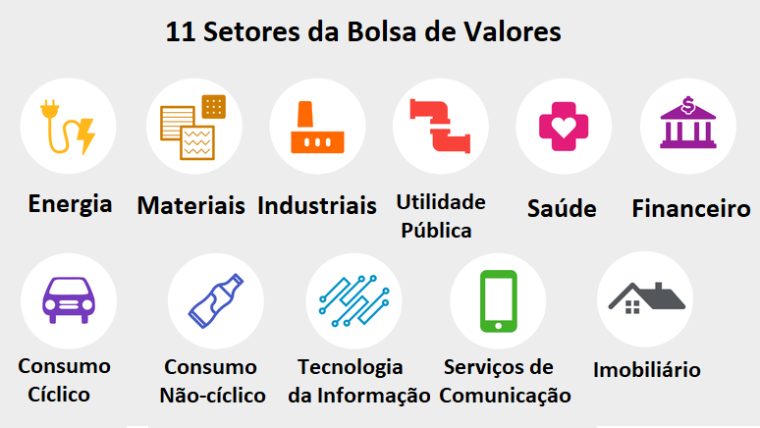

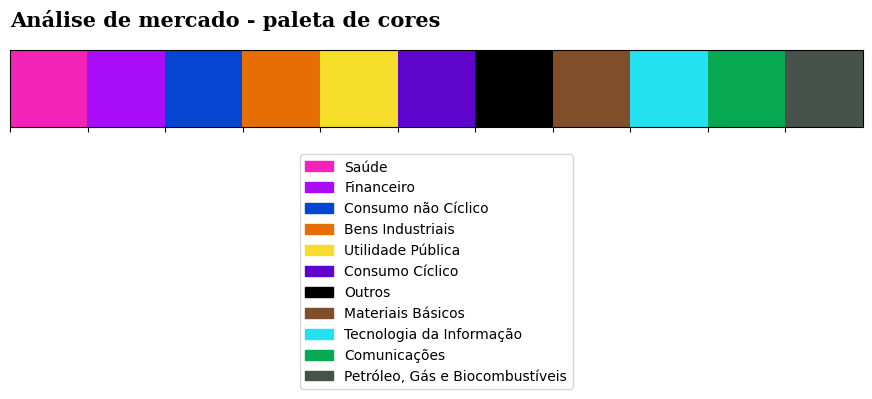

In [18]:
paleta = {'Saúde': '#f224b8',
          'Financeiro': '#a90cf7',
          'Consumo não Cíclico': '#0445d1',
          #'nan': '#ffffff',
          'Bens Industriais': '#e66e05',
          'Utilidade Pública': '#f5dd2a', #energia e utilizado pública
          'Consumo Cíclico': '#5e04cc',
          'Outros': '#000000',
          'Materiais Básicos': '#824e2a',
          'Tecnologia da Informação': '#24e1f2',
          'Comunicações': '#07a852',
          'Petróleo, Gás e Biocombustíveis': '#47524c'}

#plt.title ('Análise de mercado - paleta de cores', loc='left',fontsize=15,fontfamily='serif',y=1.2);
# Criar legendas
paleta_setores = [mpatches.Patch(color=v, label=k) for k, v in paleta.items()]

sns.palplot(paleta.values()) # mostrar paleta
plt.title ('Análise de mercado - paleta de cores', loc='left',fontsize=15,fontfamily='serif',y=1.2,fontweight='bold' );
plt.legend(handles=paleta_setores, loc=(0.34, -3.4))# Adicionar legenda
plt.show()

## Análise dos quantitativos  

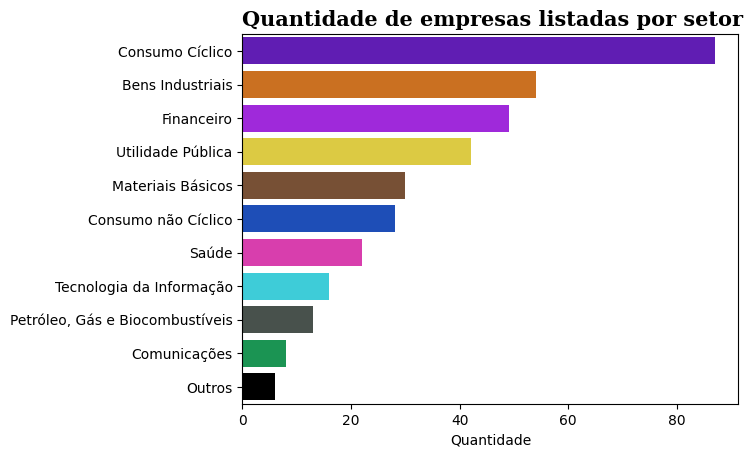

<Figure size 1400x600 with 0 Axes>

In [19]:
# Cria dicionário para mapear setor à cor
setor_to_color = {setor: paleta[setor] for setor in df_final.setor.unique()}

# Ordena setores
order = df_final.groupby('setor')['ticker'].count().sort_values(ascending=False).index

# Plotar
grafico = sns.barplot(x = df_final.ticker.count(),
            estimator='count',
            y = df_final.setor,
            data = df_final,
            errorbar = None,
            palette = setor_to_color,
            order=order);
plt.title ('Quantidade de empresas listadas por setor', loc='left',fontsize=15,fontfamily='serif',fontweight='bold');
plt.xlabel('Quantidade');
plt.ylabel('');
plt.figure(figsize=(14,6));
plt.show();

##Análise de valor de mercado

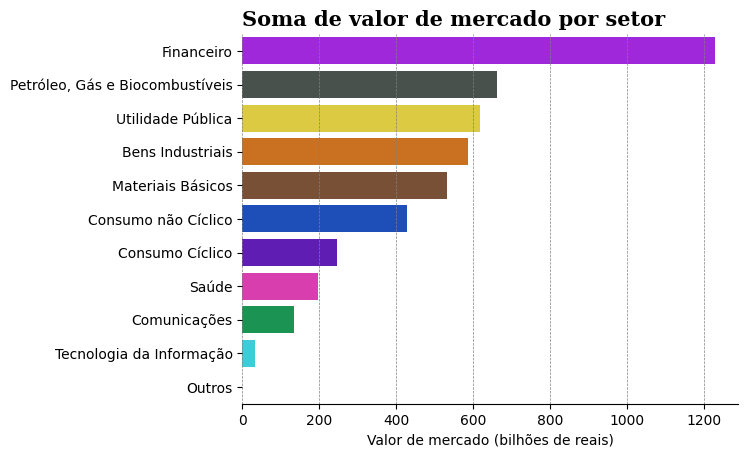

<Figure size 1400x600 with 0 Axes>

In [20]:
# Ordena setores
order = df_final.groupby('setor')['valor_mercado'].sum().sort_values(ascending=False).index

fig, ax = plt.subplots()

# Plotar
grafico = sns.barplot(x = df_final.valor_mercado/10**9,
            estimator=sum,
            y = df_final.setor,
            data = df_final,
            errorbar = None,
            palette = setor_to_color,
            order=order);

#configurações visuais
plt.title ('Soma de valor de mercado por setor', loc='left',fontsize=15,fontfamily='serif',fontweight='bold');
plt.xlabel('Valor de mercado (bilhões de reais)');
plt.ylabel('');
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

# linhas do quadro do gráfico
for i in ['top','right','left']:
    ax.spines[i].set_visible(False)

plt.figure(figsize=(14,6));
plt.show()

## Comparando dividend yield (DY) à SELIC

In [21]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json"
response = requests.get(url)


In [22]:
selic_json = response.json()
df_selic = pd.read_json(json.dumps(selic_json))
df_selic['anual'] = df_selic['valor'].apply(lambda x: round(((1 + x/100) ** 254 - 1)*100,2))
selic=df_selic.iloc[-1,2]
df_selic.tail()

,data,valor,anual
9562,29/07/2024,0.03927,10.49
9563,30/07/2024,0.03927,10.49
9564,31/07/2024,0.03927,10.49
9565,01/08/2024,0.03927,10.49
9566,02/08/2024,0.03927,10.49


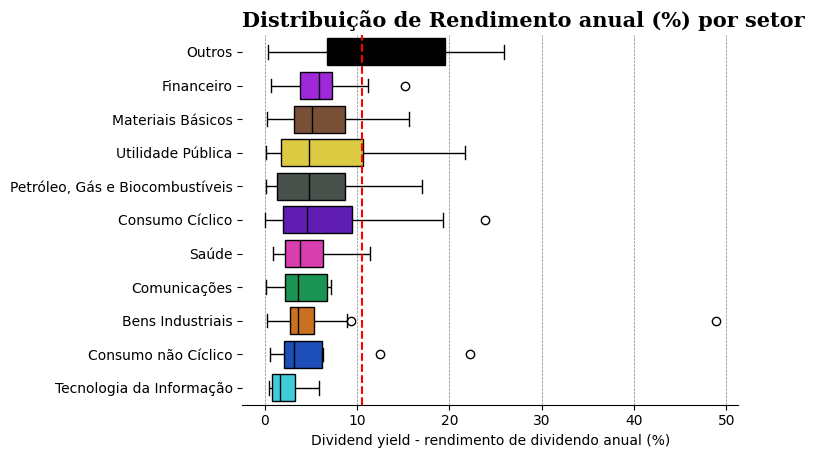

<Figure size 1400x600 with 0 Axes>

In [23]:
# Ordena setores
order = df_final.groupby('setor')['dy'].median().sort_values(ascending=False).index

#Plotar os gráficos
fig, ax = plt.subplots()

sns.boxplot(x = df_final.dy,
            y = df_final.setor,
            data = df_final,
            palette = setor_to_color,
            order=order
            );
#linha secundária
ax.axvline(x=selic, color='red', linestyle='--')


#configurações visuais
plt.title ('Distribuição de Rendimento anual (%) por setor', loc='left',fontsize=15,fontfamily='serif',fontweight='bold');
plt.xlabel('Dividend yield - rendimento de dividendo anual (%)');
plt.ylabel('');

# linhas do quadro do gráfico
for i in ['top','right','left']:
    ax.spines[i].set_visible(False)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.figure(figsize=(14,6));
plt.show()


# Criando a categoria variação mensal

In [24]:
def Variacao_mes (ticker):
    ticker = yf.download(f'{ticker}.SA', interval='1mo', start="2024-06-01")
    try:
        variacao = round((ticker.iloc[-1,4]-ticker.iloc[-2,4])/ticker.iloc[-2,4],2)*100
    except:
        variacao = None
    return variacao

df_final['variacao_mes'] = df_final.ticker.apply(Variacao_mes)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

$BRQB3.SA: possibly delisted; No price data found  (1mo 2024-06-01 -> 2024-08-04)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CATA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

$HBTS3.SA: possibly delisted; No price data found  (1mo 2024-06-01 -> 2024-08-04)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IGSN3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1mo 2024-06-01 -> 2024-08-04)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

$IGSN3.SA: possibly delisted; No price data found  (1mo 2024-06-01 -> 2024-08-04)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

## Criando coluna categórica de indicação:

In [25]:
def Categoriza_variacao(variacao):
    if variacao < -5:
        categoria = '1: Forte queda'
    elif variacao < -2:
        categoria = '2: Queda'
    elif variacao < 2:
        categoria = '3: Estável'
    elif variacao < 5:
        categoria = '4: Alta'
    else:
        categoria = '5: Forte alta'
    return categoria

df_final['tendencia'] = df_final.variacao_mes.apply(Categoriza_variacao)

## Retirar linhas faltantes e outliers

In [26]:
# retirar linhas com None na coluna variacao_mensal
df_final = df_final[df_final.variacao_mes.notna()]

In [27]:
df_final.sort_values(by="dy", ascending=False).head(15)

,ticker,preco,dy,pl,pvp,p_por_ativos,margem_bruta,margem_ebit,margem_liquida,p_ebit,...,lpa,peg_ratio,valor_mercado,setor,subsetor,segmento,nome,governanca,variacao_mes,tendencia
161,EPAR3,5.88,48.86,-3.95,1.09,0.88,14.78,5.43,-8.26,6.01,...,-1.49,0.03,8.738014e+07,Bens Industriais,Comércio,Material de Transporte,Não Informado,EMBPAR S/A,0.0,3: Estável
324,PPAR3,14.60,25.90,1.33,0.04,0.03,NaN,NaN,NaN,1.74,...,11.01,-0.03,2.160800e+06,Outros,Outros,Outros,Não Informado,POLPAR,0.0,3: Estável
237,LEVE3,33.50,23.86,5.95,4.09,1.46,29.31,19.46,17.58,5.38,...,5.63,0.28,4.540556e+09,Consumo Cíclico,Automóveis e Motocicletas,Automóveis e Motocicletas,NM,METAL LEVE,-1.0,3: Estável
147,EKTR3,40.03,21.68,7.76,2.40,0.67,28.33,22.99,11.18,3.77,...,5.16,0.36,7.836667e+09,Utilidade Pública,Energia Elétrica,Energia Elétrica,Não Informado,ELEKTRO,13.0,5: Forte alta
10,ALLD3,8.05,19.29,4.83,0.48,0.22,11.35,3.59,2.64,3.55,...,1.67,0.04,7.553611e+08,Consumo Cíclico,Comércio Varejista,"Tecidos, Vestuário e Calçados",NM,ALLIED,3.0,4: Alta
424,VULC3,15.78,18.69,8.67,2.16,1.49,41.86,19.21,17.58,7.93,...,1.82,94.34,4.334076e+09,Consumo Cíclico,"Tecidos, Vestuário e Calçados",Fios e Tecidos,NM,VULCABRAS,2.0,4: Alta
120,CSMG3,21.01,17.18,5.44,1.05,0.56,43.05,26.17,19.08,3.97,...,3.86,0.15,7.989117e+09,Utilidade Pública,Água e Saneamento,Água e Saneamento,NM,COPASA,-4.0,2: Queda
311,PETR3,38.64,16.99,4.58,1.24,0.47,52.45,35.29,22.45,2.91,...,8.44,-0.12,4.877374e+11,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",N2,PETROBRAS,-5.0,2: Queda
168,EVEN3,6.19,16.26,5.47,0.63,0.17,22.32,10.01,7.54,4.13,...,1.13,0.10,1.238000e+09,Consumo Cíclico,Construção Civil,Incorporações,NM,EVEN,-2.0,3: Estável
186,GEPA3,26.00,16.13,4.30,1.16,0.69,24.40,28.15,41.78,6.39,...,6.04,0.04,2.471004e+09,Utilidade Pública,Energia Elétrica,Energia Elétrica,Não Informado,GER PARANAP,0.0,3: Estável


In [28]:
# retirar outliers
df_filtrado = df_final[df_final.pl < 400]
df_filtrado = df_filtrado[df_filtrado.pvp < 300]
df_filtrado = df_filtrado[df_filtrado.dy < 30]

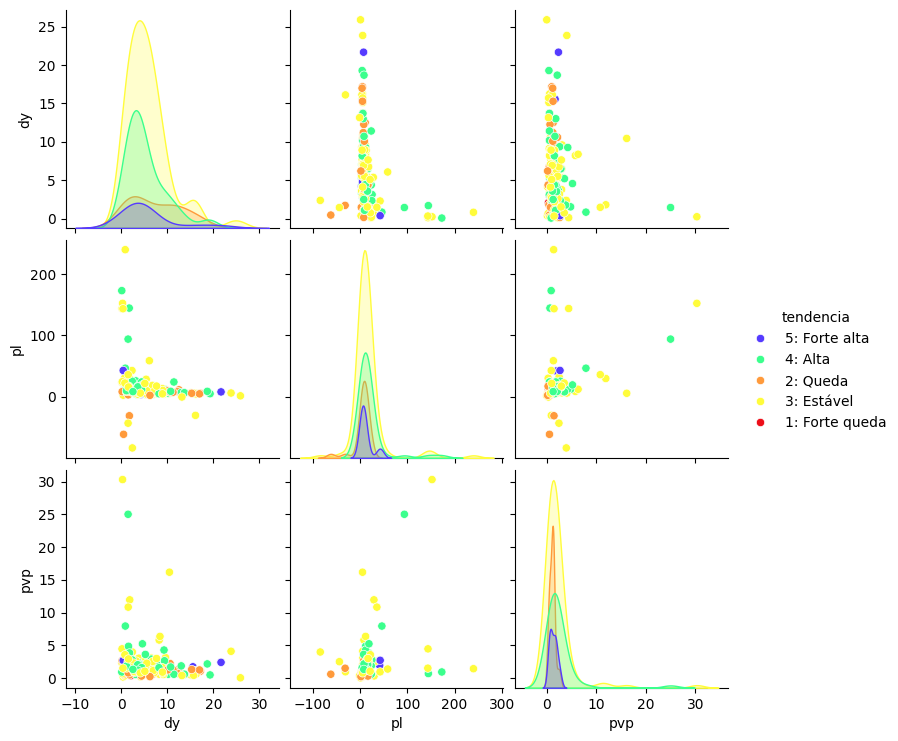

In [29]:
paleta_tendencia ={'5: Forte alta': '#553bff', '4: Alta': '#3bff8d', '3: Estável': '#fffc3b', '2: Queda': '#ff9a3b', '1: Forte queda': '#ed0e19'}

grafico = sns.pairplot(df_filtrado[['tendencia','dy', 'pl', 'pvp']],
             palette=paleta_tendencia,
             hue='tendencia',
             height=2.5,
             );


#Modelo Árvore de Decisão como machine learning

#Pré-processamento dos dados

In [30]:
df_decision_tree = df_final.drop(['tendencia','ticker','setor', 'subsetor',
       'segmento', 'nome', 'governanca', 'variacao_mes', 'preco'], axis=1)


##Treinando, testando o modelo e selecionando o melhor resultado

Média de acurácia: 0.38117647058823534
Mediana de acurácia: 0.3764705882352941
Valor máximo de acurácia: 0.5529411764705883
Valor mínimo de acurácia: 0.25882352941176473


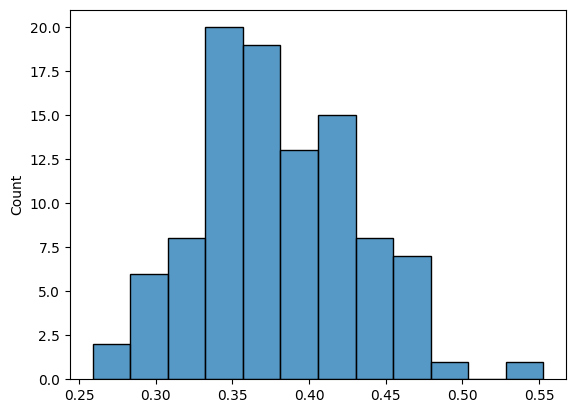

In [31]:
model = DecisionTreeClassifier()
lista_acuracia = []
for i in range (0,100):
  # separando os dados em train e test
  predictors_train, predictors_test , target_train, target_test = train_test_split(df_decision_tree,
                                                                                              df_final['tendencia'],
                                                                                              test_size=0.25)

  #treinando o modelo
  model = model.fit(predictors_train, target_train)

  #prevendo resultados
  target_predicted = model.predict(predictors_test)

  #valor de acurácia de report
  lista_acuracia.append(accuracy_score(target_test, target_predicted))

  if accuracy_score(target_test, target_predicted) >= max(lista_acuracia):
    melhor_modelo = model
    melhor_target_predicted = target_predicted
    melhor_target_test = target_test
    melhor_predictors_test = predictors_test

sns.histplot(lista_acuracia)
print(f'Média de acurácia: {np.mean(lista_acuracia)}')
print(f'Mediana de acurácia: {np.median(lista_acuracia)}')
print(f'Valor máximo de acurácia: {np.max(lista_acuracia)}')
print(f'Valor mínimo de acurácia: {np.min(lista_acuracia)}')


## Vusializando os resultados

In [32]:
melhor_modelo.__dict__


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['dy', 'pl', 'pvp', 'p_por_ativos', 'margem_bruta', 'margem_ebit',
        'margem_liquida', 'p_ebit', 'ev_ebit', 'divida_liq_por_ebit',
        'div_liq_por_patr', 'psr', 'patr_capital_de_giro', 'patr_at_',
        'liquidez_corrente', 'roe', 'roa', 'roic', 'patrim_por_ativos',
        'passivos_por_ativos', 'giro_ativos', 'cagr_receitas_5_anos',
        'cagr_lucros_5_anos', 'liquidez_media_diaria', 'vpa', 'lpa',
        'peg_ratio', 'valor_mercado'], dtype=object),
 'n_features_in_': 28,
 'n_outputs_': 1,
 'classes_': array(['1: Forte queda', '2: Queda', '3: Estável', '4: Alta',
        '5: Forte alta'], dtype=object),
 'n_classes_': 5,
 'max_features_': 28,
 'tree_': <s

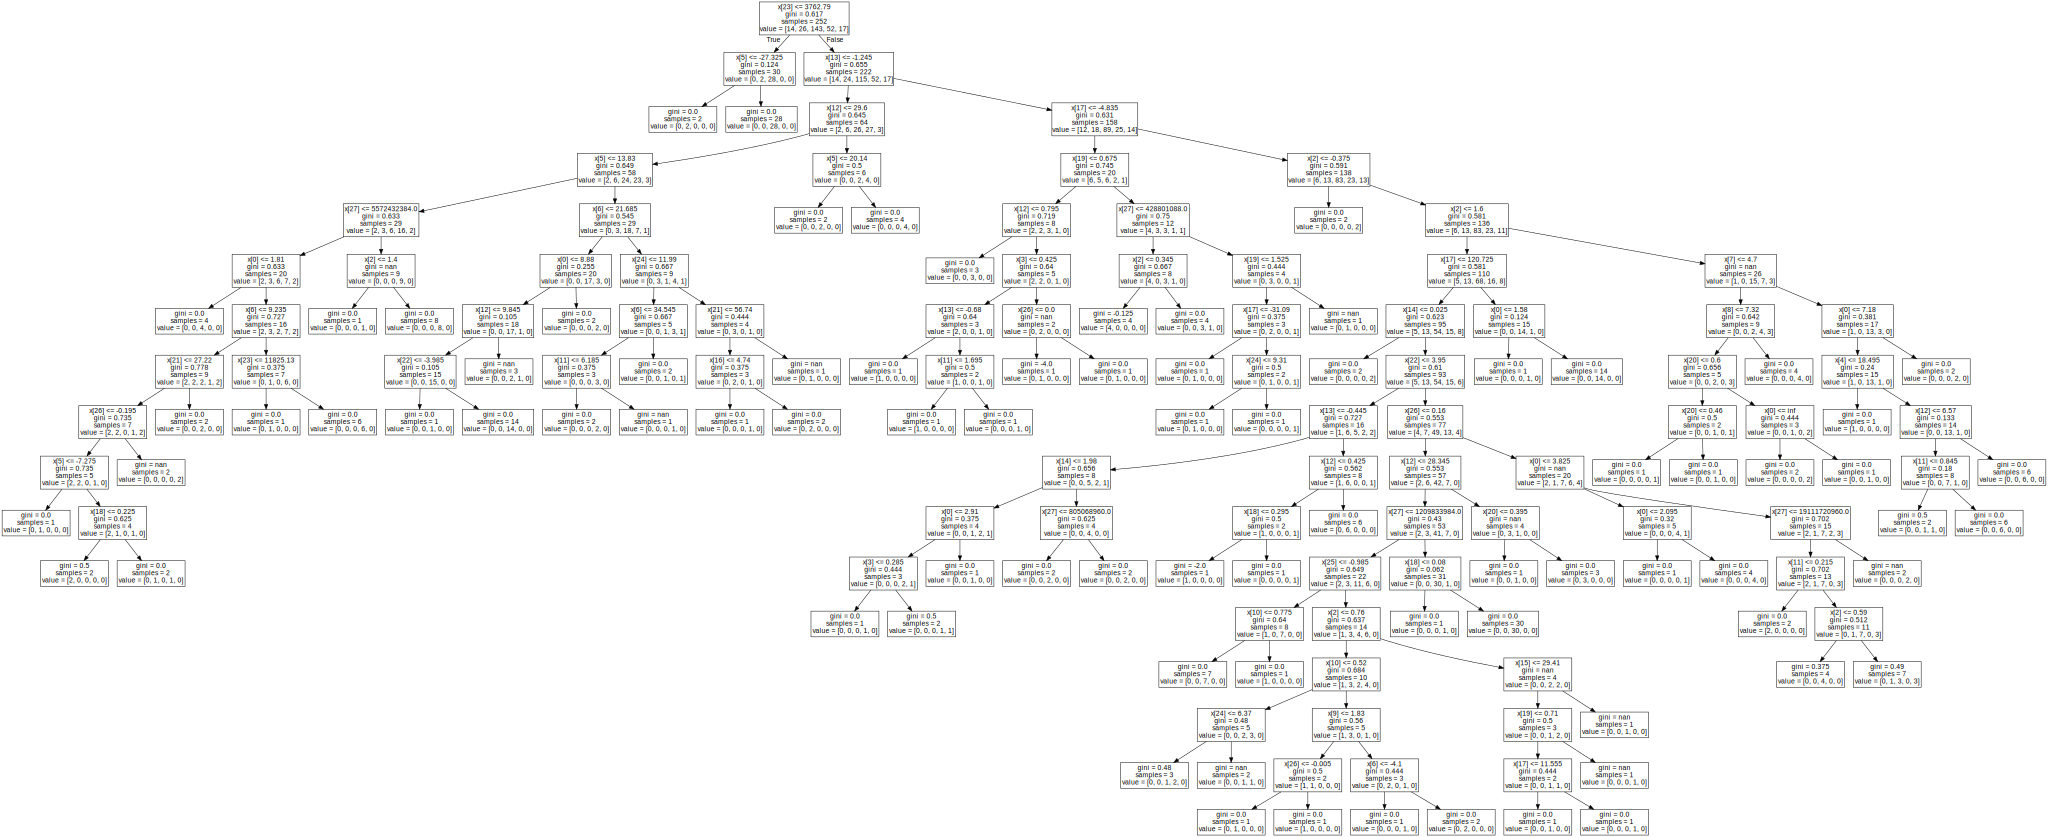

In [47]:
tree_data = tree.export_graphviz(melhor_modelo, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [48]:
print(" Índice de colunas")
lista_indice = []
for i in range(0,len(df_decision_tree.columns)):
  lista_indice.append(f"X[{i}]: {df_decision_tree.columns[i]}")
print(lista_indice)

print("\n Valores de resultado:")
print(melhor_modelo.classes_)

 Índice de colunas
['X[0]: dy', 'X[1]: pl', 'X[2]: pvp', 'X[3]: p_por_ativos', 'X[4]: margem_bruta', 'X[5]: margem_ebit', 'X[6]: margem_liquida', 'X[7]: p_ebit', 'X[8]: ev_ebit', 'X[9]: divida_liq_por_ebit', 'X[10]: div_liq_por_patr', 'X[11]: psr', 'X[12]: patr_capital_de_giro', 'X[13]: patr_at_', 'X[14]: liquidez_corrente', 'X[15]: roe', 'X[16]: roa', 'X[17]: roic', 'X[18]: patrim_por_ativos', 'X[19]: passivos_por_ativos', 'X[20]: giro_ativos', 'X[21]: cagr_receitas_5_anos', 'X[22]: cagr_lucros_5_anos', 'X[23]: liquidez_media_diaria', 'X[24]: vpa', 'X[25]: lpa', 'X[26]: peg_ratio', 'X[27]: valor_mercado']

 Valores de resultado:
['1: Forte queda' '2: Queda' '3: Estável' '4: Alta' '5: Forte alta']


## Avaliando o resultado do modelo

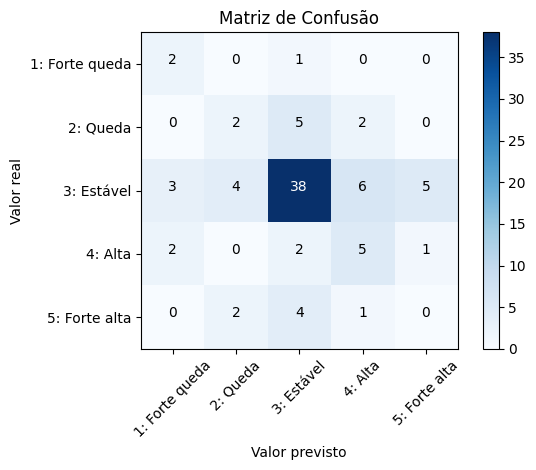

In [49]:
cm = confusion_matrix(melhor_target_test, melhor_target_predicted)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(melhor_modelo.classes_))

plt.xticks(tick_marks, melhor_modelo.classes_, rotation=45)
plt.yticks(tick_marks, melhor_modelo.classes_)
fmt  = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('Valor real')
plt.xlabel('Valor previsto')
plt.tight_layout()
plt.show()

In [51]:
report = classification_report(melhor_target_test, melhor_target_predicted)
print(report)


                precision    recall  f1-score   support

1: Forte queda       0.29      0.67      0.40         3
      2: Queda       0.25      0.22      0.24         9
    3: Estável       0.76      0.68      0.72        56
       4: Alta       0.36      0.50      0.42        10
 5: Forte alta       0.00      0.00      0.00         7

      accuracy                           0.55        85
     macro avg       0.33      0.41      0.35        85
  weighted avg       0.58      0.55      0.56        85



O relatório de classificação fornece uma visão geral do desempenho do modelo, incluindo métricas como:

- precision: A proporção de exemplos positivos corretamente classificados entre todos os exemplos classificados como positivos.
- recall: A proporção de exemplos positivos corretamente classificados entre todos os exemplos realmente positivos.
- f1-score: A média harmônica entre precisão e recall.
- support: O número de ocorrências de cada classe na base de dados.

#Conclusões

Com os dados apresentados, mesmo com uma complexa árvore de decisão, a acurácia é relativamente baixa para a prever a tendência de um ativo através de seus dados fundamentalistas.

Em sua maioria, apresentam dados próximos ao real.